In [7]:
from collections import Counter
import pandas as pd
from sklearn.model_selection import (train_test_split)
from sklearn.metrics import (
    mean_squared_error as MSE,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    average_precision_score,
    log_loss,

)

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
import numpy as np
import optuna
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

scaler = StandardScaler()
data = pd.read_csv("data/employee_data.csv")
oversample = SMOTE()
encoder = OrdinalEncoder()

X = data.drop(columns=["Staying?"])
y = data["Staying?"]

# exploratory data analysis


In [8]:
data.head(2)

,Age,Staying?,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [9]:
list(data.columns)

['Age',
 'Staying?',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Staying?                  1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
data.shape

(1470, 35)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

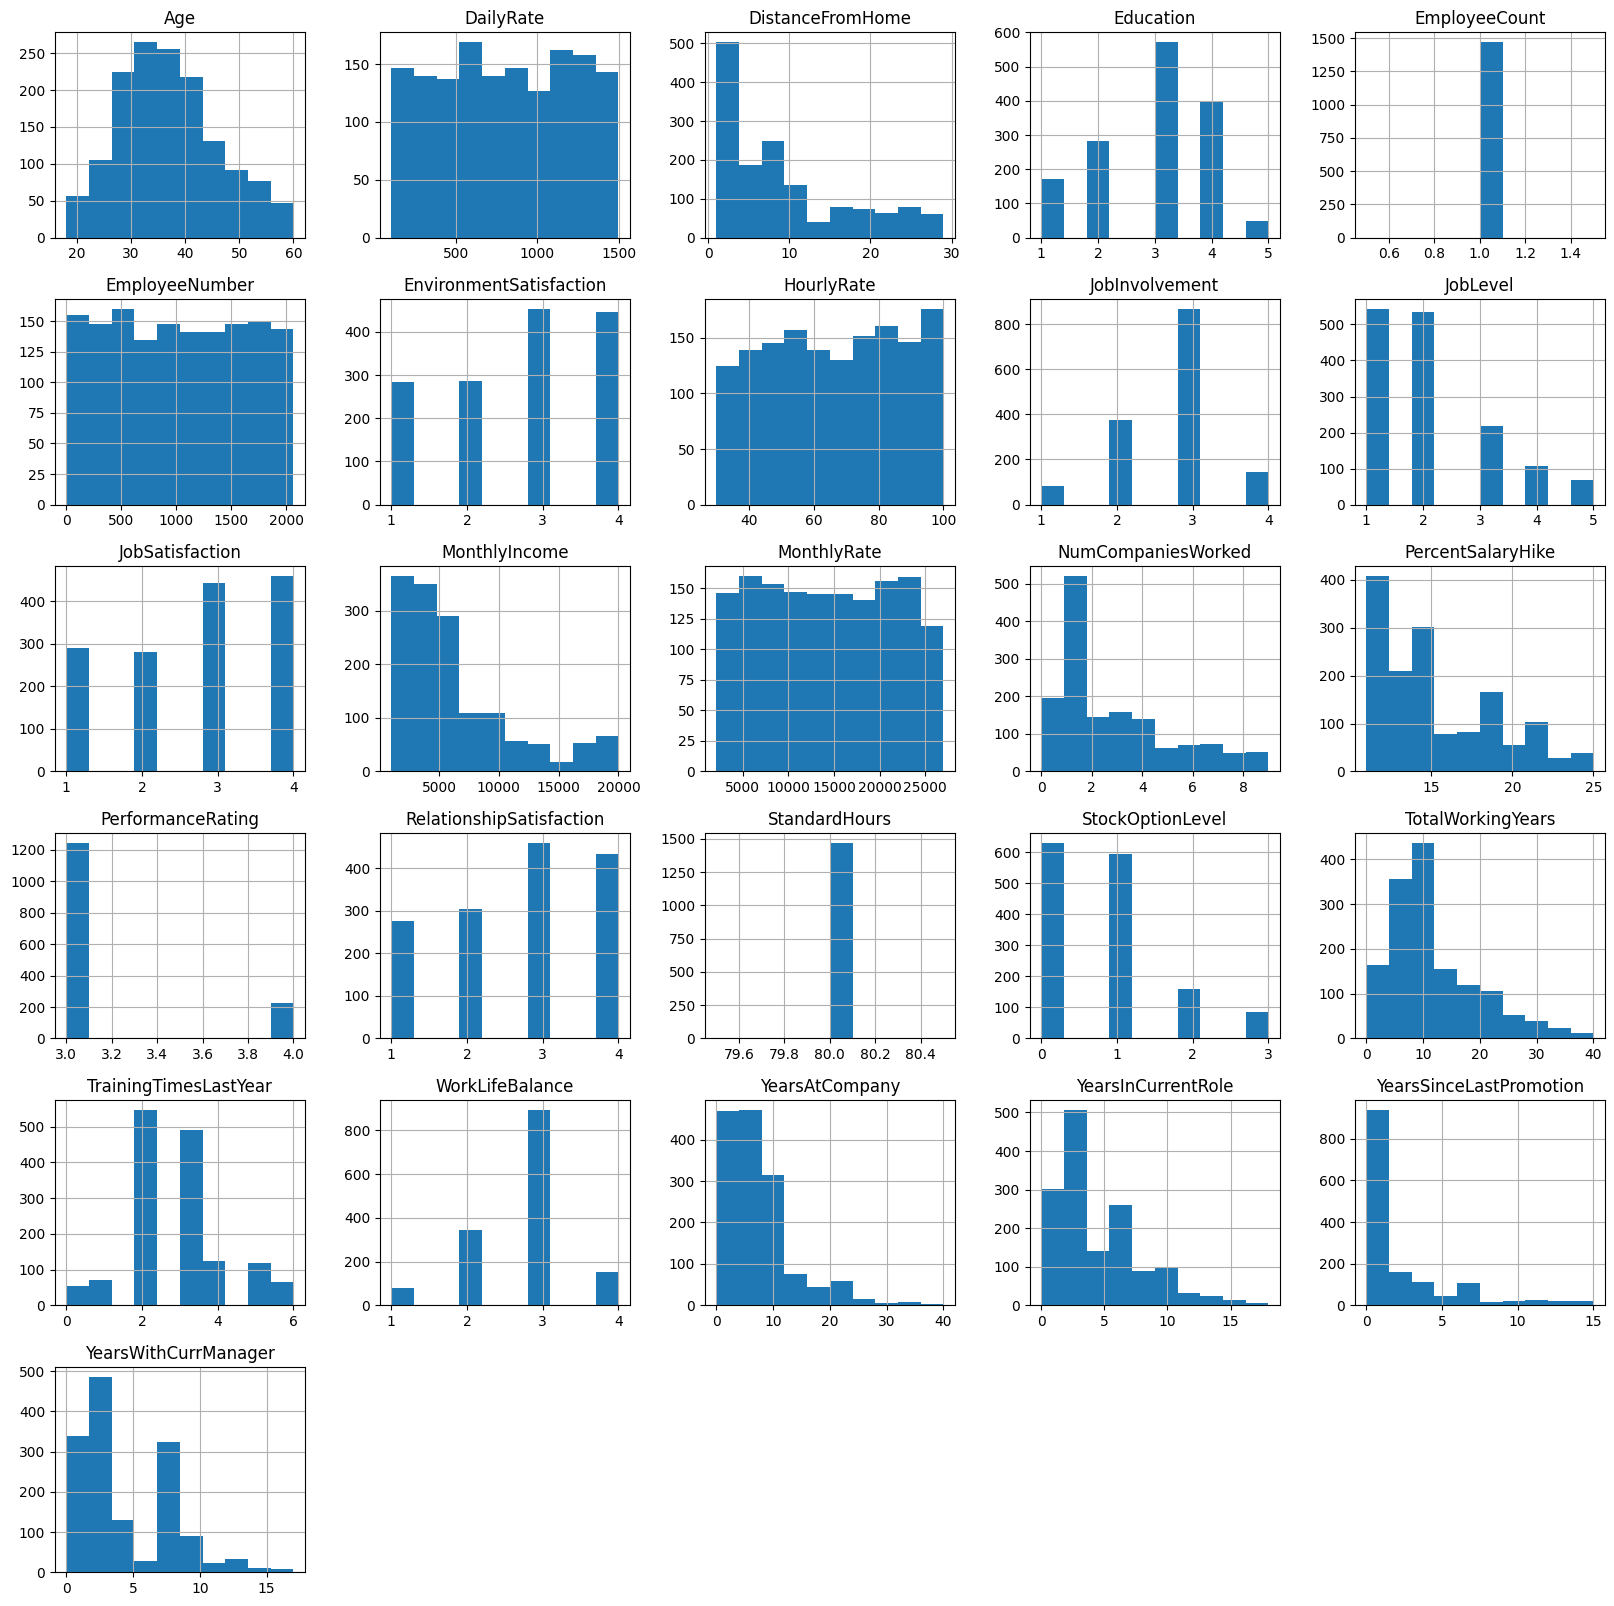

In [13]:
data.hist(figsize=(20, 20))

Staying?
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

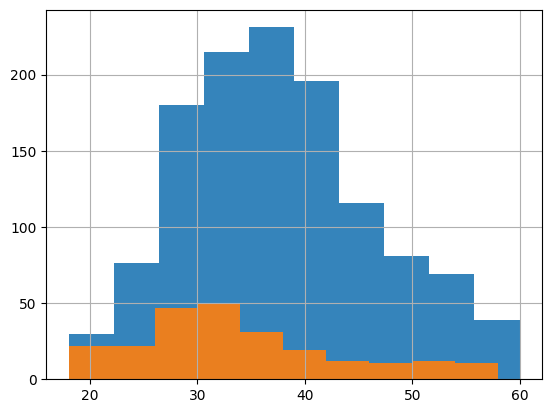

In [14]:
data.groupby("Staying?").Age.hist(alpha=0.9)

Staying?
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: MonthlyIncome, dtype: object

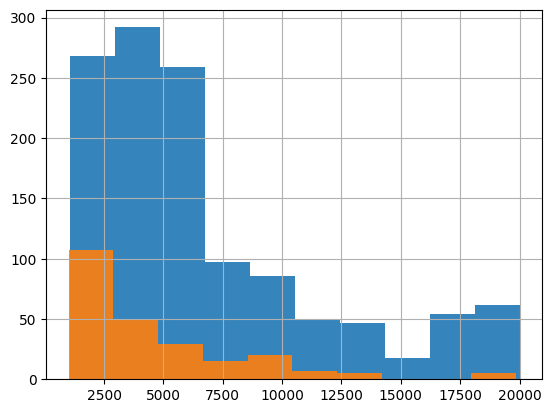

In [15]:
data.groupby("Staying?").MonthlyIncome.hist(alpha=0.9)

Staying?
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: YearsAtCompany, dtype: object

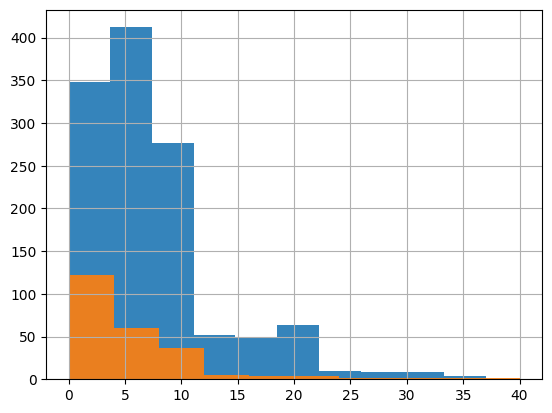

In [16]:
data.groupby("Staying?").YearsAtCompany.hist(alpha=0.9)

Staying?
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: MonthlyIncome, dtype: object

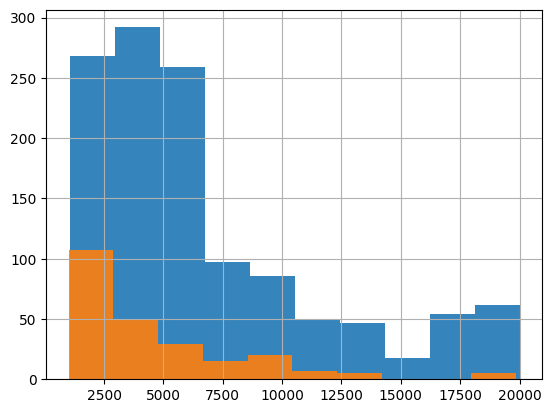

In [86]:
data.groupby("Staying?").MonthlyIncome.hist(alpha=0.9, stacked=False)

Staying?
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: Education, dtype: object

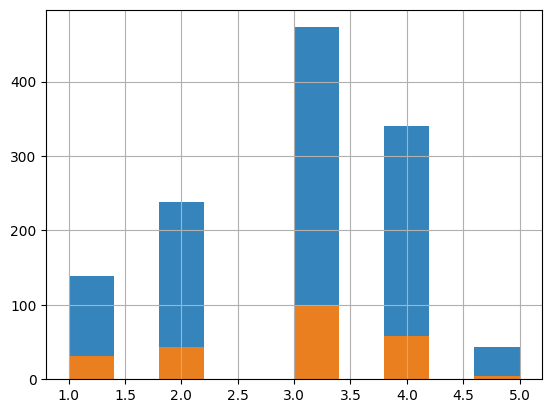

In [17]:
data.groupby("Staying?").Education.hist(alpha=0.9, stacked=False)

Staying?
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: EnvironmentSatisfaction, dtype: object

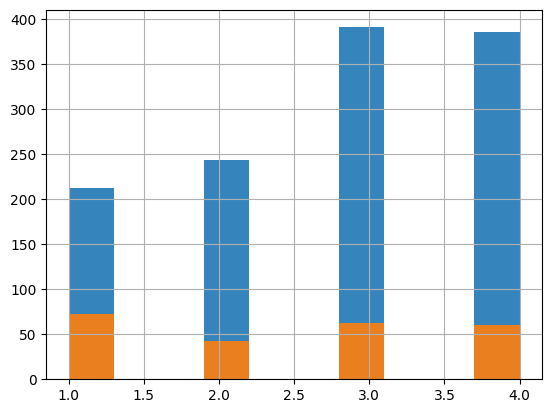

In [18]:
data.groupby("Staying?").EnvironmentSatisfaction.hist(alpha=0.9)

Staying?
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: YearsAtCompany, dtype: object

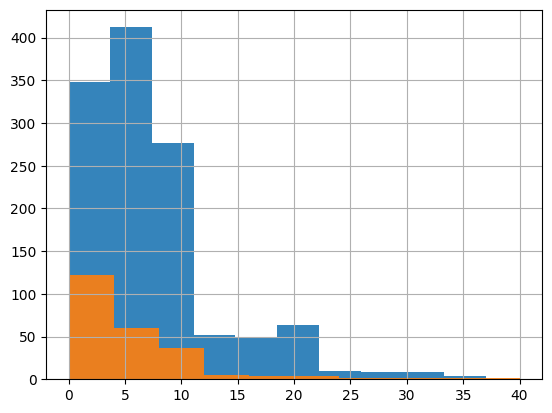

In [84]:
data.groupby("Staying?").YearsAtCompany.hist(alpha=0.9)

Staying?
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: JobLevel, dtype: object

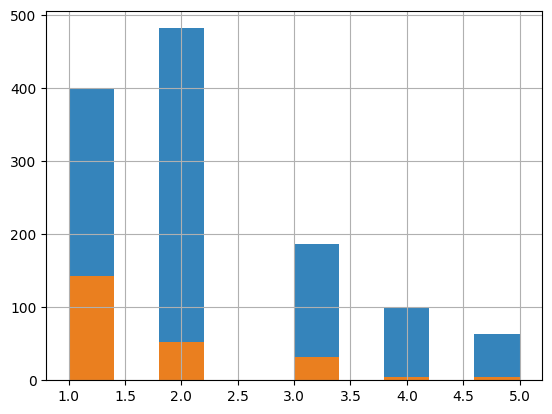

In [19]:
data.groupby("Staying?").JobLevel.hist(alpha=0.9)

Staying?
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: NumCompaniesWorked, dtype: object

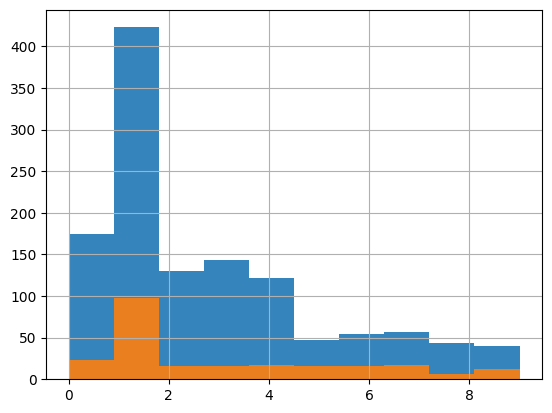

In [20]:
data.groupby("Staying?").NumCompaniesWorked.hist(alpha=0.9)

Staying?
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: Gender, dtype: object

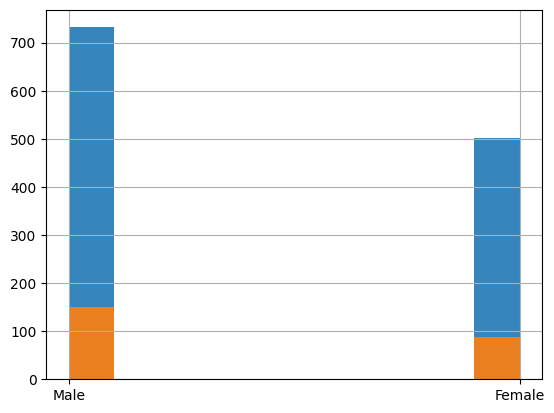

In [21]:
data.groupby("Staying?").Gender.hist(alpha=0.9)

<Axes: >

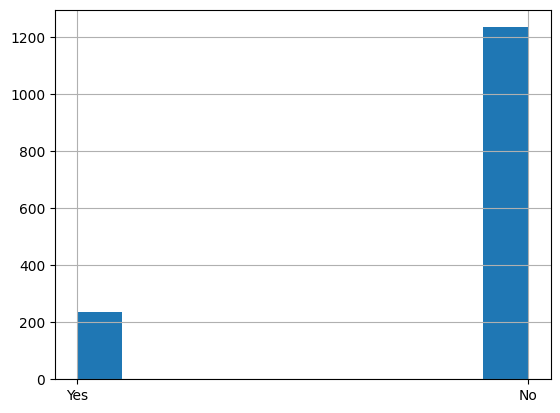

In [22]:
y.hist()

In [23]:
print(data["Staying?"].value_counts())
print(data["Staying?"].value_counts(normalize=True))

Staying?
No     1233
Yes     237
Name: count, dtype: int64
Staying?
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


In [24]:
data.describe(exclude="number")

,Staying?,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


# feature engineering


In [25]:
data = data.drop(
    [
        "EmployeeCount",
        "EmployeeNumber",
        "Over18",
        "StandardHours",
        "DailyRate",
        "HourlyRate",
        "MonthlyRate",
        # remove due to unimportance
        # "BusinessTravel",
        # "Department",
        # "Education",
        # "EducationField",
        # "Gender",
        # "PercentSalaryHike",
        # "PerformanceRating",
        # "RelationshipSatisfaction",
        # "TrainingTimesLastYear",
    ],
    axis=1,
)
data["first_company"] = np.where(data.NumCompaniesWorked == 0, 1, 0)
data["first_role"] = np.where(data.YearsAtCompany == data.YearsInCurrentRole, 1, 0)
data["first_manager"] = np.where(data.YearsWithCurrManager == data.YearsAtCompany, 1, 0)

In [26]:
X = data.drop(columns=["Staying?"])
y = data["Staying?"]

# turns categorical columns into numerical columns
X = pd.DataFrame(encoder.fit_transform(X), columns=encoder.get_feature_names_out())

categorical_cols = X.select_dtypes(include="object").columns.tolist()
categorical_cols.append("Education")
categorical_cols.append("EnvironmentSatisfaction")
categorical_cols.append("JobInvolvement")
categorical_cols.append("JobLevel")
categorical_cols.append("JobSatisfaction")
categorical_cols.append("PerformanceRating")
categorical_cols.append("RelationshipSatisfaction")
categorical_cols.append("WorkLifeBalance")
categorical_cols.append("StockOptionLevel")

# same as factors in R
for col in categorical_cols:
    X[col] = X[col].astype("category")

y.replace("Yes", 1, inplace=True)
y.replace("No", 0, inplace=True)
y.astype(int)


# use stratify due to imbalanced data with classification
X_train, X_leftover, y_train, y_leftover = train_test_split(X, y, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_leftover, y_leftover, test_size=0.5, stratify=y_leftover)

# to handle imbalance
# X_train, y_train = oversample.fit_resample(X_train, y_train)


d_train = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
d_val = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
d_test = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [28]:
Counter(y_train)

Counter({0: 863, 1: 166})

In [29]:
Counter(y)[0] / Counter(y)[1]
# or the sq root of that. most of the models use the sq root

5.2025316455696204

bagging reduces variance

boosting decreases bias

when making a model, you have to pick between bias and variance. high model complexity
with large data is good. with small data will probably lead to overfitting.


lambda: l1. bigger = underfit
* lasso
* higher penalty reduces magnitude of coefficients
* reduces model complexity. it's like higher penalty = higher max depth
* adds sum of |coefficients|

alpha: l2. bigger = underfit. when you have a lot of features
* ridge
* penalty = sum of squares of magnitudes
* squared and added

Regularization, significantly reduces the variance of the model, without substantial increase in its bias.

## overfitting

1st. model complexity

- max_depth
- min_child_weight
- gamma (min_split_loss) Minimum sum of instance weight (hessian) needed in a child. 

2nd. randomness, to make training robust to noise

- subsample
- colsample_bytree

## imbalance

overall performance

- scale_pos_weight
- use auc for evaluation

correct probability

- when you can't rebalance
- max_delta_step to finite number

## eval metrics

(auc) roc auc

- not when heavily imbalanced
- receiver operator characteristic
- binary

(aucpr) pr auc

- when heavily imbalanced
- positive class

(map) mean average precision

- a

(f score) harmonic mean of precision and recall

- when you care more about positive

logloss
- loss in log


In [30]:
storage = optuna.storages.RDBStorage(
    url="sqlite:///employee_data.db",
)

In [31]:
# optuna.study.delete_study("employee_data_f1", storage=storage)

## pruners

to stop the trial when it's not improving after a few trees

Hyperband
* assigns an amount of resources to the first params
* later params get more resources
* too complex for me to understand

Median
* if trial's best intermediate result is worse than median of previous intermediate results, skip these params

## samplers

to pick hyperparameters to use

TPE
* maxes at about 1000 trials
* tree-structured  parzen estimator
* gaussian mixture model (gmm) with params that made the best objectives values (l(x))
and another gmm to the untested params (g(x)). it then chooses which params to test by maximizing the ratio
of l(x) / g(x). it's like xgb for parameters, and backwards.
* little time and money


Random
* just random combinations
* if you have a lot of time and money

In [32]:
optuna.logging.set_verbosity(optuna.logging.INFO)

recall_study = optuna.create_study(
    storage=storage,
    direction="maximize",
    study_name="employee_data_recall",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
)

f1_study = optuna.create_study(
    storage=storage,
    direction="maximize",
    study_name="employee_data_f1",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
)

auc_study = optuna.create_study(
    storage=storage,
    direction="maximize",
    study_name="employee_data_auc",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
)

logloss_study = optuna.create_study(
    storage=storage,
    direction="minimize",
    study_name="employee_data_logloss",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
)

f1_weighted_study = optuna.create_study(
    storage=storage,
    direction="maximize",
    study_name="employee_data_f1_weighted",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
)

# shit ton of parallel trees
f1_weighted_study2 = optuna.create_study(
    storage=storage,
    direction="maximize",
    study_name="employee_data_f1_weighted2",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
)

# no parallel trees
f1_weighted_study3 = optuna.create_study(
    storage=storage,
    direction="maximize",
    study_name="employee_data_f1_weighted3",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
)

f1_aucpr_study = optuna.create_study(
    # storage=storage,
    direction="maximize",
    study_name="employee_data_f1_aucpr",
    load_if_exists=True,
    pruner=optuna.pruners.MedianPruner(n_startup_trials=500),
    sampler=optuna.samplers.RandomSampler()
)

confusion_study = optuna.create_study(
    storage=storage,
    directions=["minimize", "minimize", "maximize", "maximize"],
    study_name="employee_data_confusion",
    load_if_exists=True,
)

recall_fn_study = optuna.create_study(
    storage=storage,
    directions=["maximize", "minimize"],
    study_name="employee_data_recall_fn",
    load_if_exists=True,
)

[I 2023-06-08 17:20:26,516] Using an existing study with name 'employee_data_recall' instead of creating a new one.
[I 2023-06-08 17:20:26,526] Using an existing study with name 'employee_data_f1' instead of creating a new one.
[I 2023-06-08 17:20:26,533] Using an existing study with name 'employee_data_auc' instead of creating a new one.
[I 2023-06-08 17:20:26,537] Using an existing study with name 'employee_data_logloss' instead of creating a new one.
[I 2023-06-08 17:20:26,541] Using an existing study with name 'employee_data_f1_weighted' instead of creating a new one.
[I 2023-06-08 17:20:26,548] Using an existing study with name 'employee_data_f1_weighted2' instead of creating a new one.
[I 2023-06-08 17:20:26,552] Using an existing study with name 'employee_data_f1_weighted3' instead of creating a new one.
[I 2023-06-08 17:20:26,557] A new study created in memory with name: employee_data_f1_aucpr
[I 2023-06-08 17:20:26,558] Using an existing study with name 'employee_data_confusio

In [33]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

most of the tests suggest that sqrt(pos/neg) works better than pos/neg for scale_pos_weight

make sure to set max trees to start at range 0 so it can use pure boosting if it wants to

no parallel trees makes it run way faster - there's a super duper tiny decrease in performance without random forest

In [34]:
def objective(trial):
    test_metric = "auc"
    
    param = {
        # "verbosity": 0,
        "objective": "binary:logistic",
        "tree_method": "hist",
        "eval_metric": f"{test_metric}",
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0, 6),
        # "scale_pos_weight": Counter(y)[0] / Counter(y)[1],
        # "max_delta_step": trial.suggest_int("max_delta_step", 0, 10),
        "booster": trial.suggest_categorical("booster", ["gbtree","dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 10.0),
        "alpha": trial.suggest_float("alpha", 0, 10.0, ),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0, log=True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 1.0), 
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.1, 1.0), 
        "sampling_method": "uniform",  # uniform, gradient_based
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 50),
        "max_bin": trial.suggest_int("max_bin", 10, 2000),
        # "num_parallel_tree": trial.suggest_int("num_parallel_tree", 0, 500),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0),
        "gamma": trial.suggest_float("gamma", 1e-8, 10.0),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise","lossguide"]),
    }

    if param["grow_policy"] == "lossguide":
        param["max_leaves"] = trial.suggest_int("max_leaves", 0, 100)

    if param["booster"] == "dart":
        param["sample_type"] = "uniform"
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree","forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0)
        param["one_drop"] = trial.suggest_categorical("one_drop", [True,False])
        
    # pruning_callback = optuna.integration.XGBoostPruningCallback(trial, f"validate-{test_metric}")
    clf = xgb.train(param, 
                    d_train, 
                    evals=[(d_val, "validate")], 
                    # callbacks=[pruning_callback],
                    early_stopping_rounds=10,
                    num_boost_round=10000,
                    verbose_eval=0,
                )
    
    y_pred = clf.predict(d_val)
    labels = np.rint(y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, labels).ravel()
    # pr auc
    # prauc = average_precision_score(y_val, labels, average="weighted")
    # f1 = f1_score(y_val, labels, zero_division=0)
    # auc = roc_auc_score(y_val, labels)
    recall = recall_score(y_val, labels, zero_division=0)
    # logloss = log_loss(y_val, labels)
    # precision = precision_score(y_val, labels, zero_division=0)
    # accuracy = accuracy_score(y_val, labels)
    
    return recall, fn



# study.optimize(objective, n_trials=1000, n_jobs=1, show_progress_bar=True, gc_after_trial=True)

In [35]:
study = optuna.create_study(
    # storage=storage,
    # direction="maximize",
    directions=["maximize", "minimize"],
    study_name="employee_data_f1_weighted",
    load_if_exists=True,
    # pruner=optuna.pruners.MedianPruner(n_startup_trials=1500),
    # sampler=optuna.samplers.RandomSampler()
    # pruner=optuna.pruners.HyperbandPruner(),
    # sampler=optuna.samplers.TPESampler(n_startup_trials=100),
    # sampler=optuna.samplers.MOTPESampler(n_startup_trials=100),
    # pruner=optuna.pruners.HyperbandPruner()
)

In [36]:
# recall_fn_study.add_trials(study.trials)

In [37]:
# study.optimize(objective, n_trials=10000, show_progress_bar=True)

In [38]:
study.best_trials

[]

In [ ]:
study.best_params

## accuracy or precision?

When false positives are absolutely bad, then recall = good. Health - You must take FP into consideration

Otherwise, precision is good

## 

In [40]:
def best_trials_evaluator(study):
    results = []

    for i in study.best_trials:
        params = i.params
        params["tree_method"] = "auto"
        params["eval_metric"] = "auc"
        params["objective"] = "binary:logistic"
        
        clf = xgb.train(
            params, 
            d_train, 
            evals=[(d_val, "validate")],
            early_stopping_rounds=10,
            num_boost_round=10000,
            verbose_eval=0,
            maximize=True,
        )
        
        y_pred = clf.predict(d_test)
        labels = np.rint(y_pred)

        recall = round(recall_score(y_test, labels), 2)
        f1 = round(f1_score(y_test, labels), 2)
        rmse = round(MSE(y_test, labels, squared=False), 2)
        accuracy = round(accuracy_score(y_test, labels), 2)
        precision = round(precision_score(y_test, labels), 2)
        auc = round(roc_auc_score(y_test, labels), 2)
        prauc = round(average_precision_score(y_test, labels), 2)
        logloss = round(log_loss(y_test, labels), 2)
        
        results.append({"precision": precision, "recall": recall, "f1_score": f1, "roc_auc": auc, "pr_auc": prauc, "accuracy": accuracy, "rmse": rmse, "logloss": logloss,"params": params})
        
    return pd.DataFrame(results)



In [41]:
def evaluate_study(params, dtrain, dval, dtest, y_test):
    params = params
    params["tree_method"] = "auto"
    params["eval_metric"] = "auc"
    params["objective"] = "binary:logistic"
    
    
    clf = xgb.train(
        params, 
        dtrain, 
        # evals=[(dtrain, "train"), (dval, "validate")],
        evals=[(dval, "validate")],
        early_stopping_rounds=10,
        num_boost_round=10000,
        verbose_eval=100,
        maximize=True,
    )
    
    y_pred = clf.predict(dtest)
    labels = np.rint(y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, labels).ravel()
    
    print(classification_report(y_test, labels.round(), zero_division=0))
    print(confusion_matrix(y_test, labels.round()))
    print(tn)
    print(fp)
    print(fn)
    print(tp)
    xgb.plot_importance(clf)
    
    return clf

# current study

In [ ]:
best_trials_evaluator(study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.28,0.69,0.40,0.67,0.24,0.66,0.58,5.41,"{'scale_pos_weight': 5.810079991492914, 'boost..."
1,0.33,0.64,0.43,0.69,0.27,0.73,0.52,4.33,"{'scale_pos_weight': 5.810079991492914, 'boost..."
2,0.36,0.75,0.49,0.75,0.31,0.75,0.50,4.04,"{'scale_pos_weight': 5.810079991492914, 'boost..."
3,0.24,0.83,0.37,0.66,0.23,0.54,0.68,7.36,"{'scale_pos_weight': 5.810079991492914, 'boost..."
4,0.32,0.72,0.44,0.71,0.28,0.71,0.54,4.69,"{'scale_pos_weight': 5.810079991492914, 'boost..."
...,...,...,...,...,...,...,...,...,...
2858,0.17,0.97,0.29,0.53,0.17,0.24,0.87,12.19,"{'scale_pos_weight': 5.93419712331834, 'booste..."
2859,0.19,0.94,0.32,0.58,0.19,0.33,0.82,10.60,"{'scale_pos_weight': 5.992171480463295, 'boost..."
2860,0.25,0.61,0.36,0.63,0.22,0.64,0.60,5.70,"{'scale_pos_weight': 5.93419712331834, 'booste..."
2861,0.17,1.00,0.29,0.53,0.17,0.22,0.88,12.48,"{'scale_pos_weight': 5.93419712331834, 'booste..."


In [ ]:
trials_table = best_trials_evaluator(study)

[0]	validate-auc:0.60463
[33]	validate-auc:0.81552
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       185
           1       0.39      0.75      0.51        36

    accuracy                           0.76       221
   macro avg       0.66      0.76      0.68       221
weighted avg       0.85      0.76      0.79       221

[[142  43]
 [  9  27]]
142
43
9
27


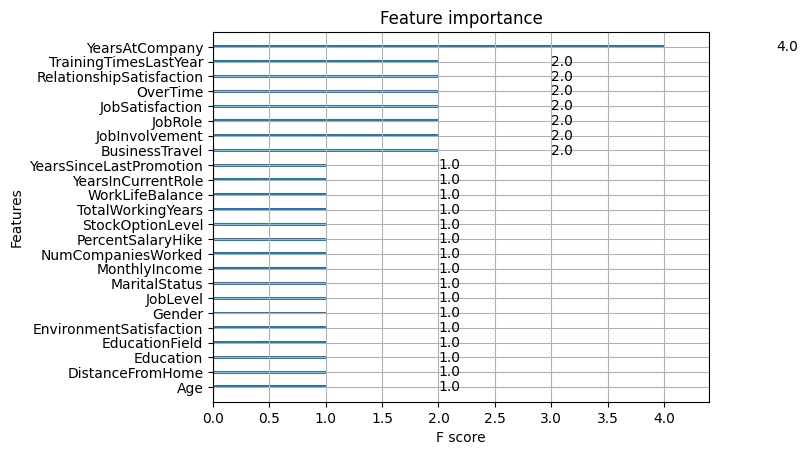

In [ ]:
clf = evaluate_study(study.best_trials[2].params, d_train, d_val, d_test, y_test)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

# confusion study

In [42]:
best_trials_evaluator(confusion_study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.62,0.44,0.52,0.70,0.36,0.86,0.37,2.16,"{'alpha': 0.40242617745673726, 'booster': 'gbt..."
1,0.41,0.61,0.49,0.72,0.31,0.79,0.46,3.32,"{'alpha': 1.6137892666326081, 'booster': 'gbtr..."
2,0.39,0.83,0.53,0.79,0.35,0.76,0.49,3.82,"{'alpha': 6.077270476499942, 'booster': 'gbtre..."
3,0.33,0.78,0.47,0.74,0.30,0.71,0.54,4.62,"{'alpha': 4.756943910162018, 'booster': 'gbtre..."
4,0.40,0.56,0.47,0.70,0.29,0.79,0.46,3.32,"{'alpha': 6.077270476499942, 'booster': 'gbtre..."
...,...,...,...,...,...,...,...,...,...
1367,0.70,0.39,0.50,0.68,0.37,0.87,0.36,2.02,"{'alpha': 0.40242617745673726, 'booster': 'gbt..."
1368,0.70,0.39,0.50,0.68,0.37,0.87,0.36,2.02,"{'alpha': 0.40242617745673726, 'booster': 'gbt..."
1369,0.70,0.39,0.50,0.68,0.37,0.87,0.36,2.02,"{'alpha': 0.40242617745673726, 'booster': 'gbt..."
1370,0.70,0.39,0.50,0.68,0.37,0.87,0.36,2.02,"{'alpha': 0.40242617745673726, 'booster': 'gbt..."


In [83]:
confusion_study_table = best_trials_evaluator(confusion_study)

In [87]:
confusion_study.best_trials[2].params

{'alpha': 6.077270476499942,
 'booster': 'gbtree',
 'colsample_bylevel': 0.7442016120847124,
 'colsample_bynode': 0.36348369832337923,
 'colsample_bytree': 0.5990145839652417,
 'gamma': 1.730344908188708,
 'grow_policy': 'lossguide',
 'lambda': 1.3634419140416907,
 'learning_rate': 0.8649703871707154,
 'max_bin': 1854,
 'max_depth': 1,
 'max_leaves': 1,
 'min_child_weight': 9.107334012298484,
 'scale_pos_weight': 5.319937625833759,
 'subsample': 0.8642903973298931}

[0]	validate-auc:0.63591
[25]	validate-auc:0.89344
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       185
           1       0.39      0.83      0.53        36

    accuracy                           0.76       221
   macro avg       0.67      0.79      0.68       221
weighted avg       0.87      0.76      0.79       221

[[138  47]
 [  6  30]]
138
47
6
30


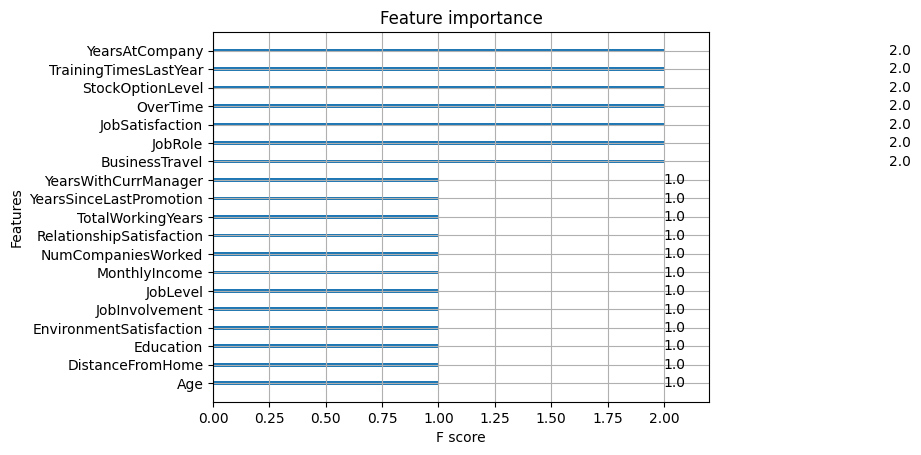

In [43]:
clf = evaluate_study(confusion_study.best_trials[2].params, d_train, d_val, d_test, y_test)

# recall fn study

In [44]:
best_trials_evaluator(recall_fn_study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.28,0.67,0.40,0.67,0.24,0.67,0.57,5.27,"{'alpha': 0.9029324658479276, 'booster': 'dart..."
1,0.37,0.83,0.51,0.78,0.33,0.74,0.51,4.18,"{'alpha': 0.3951534610203078, 'booster': 'gbtr..."
2,0.35,0.83,0.49,0.77,0.32,0.72,0.53,4.47,"{'alpha': 9.972221937593368, 'booster': 'gbtre..."
3,0.18,0.47,0.26,0.53,0.17,0.57,0.66,6.85,"{'alpha': 9.972221937593368, 'booster': 'dart'..."
4,0.27,0.64,0.38,0.65,0.23,0.66,0.58,5.41,"{'alpha': 5.259060951830453, 'booster': 'dart'..."
...,...,...,...,...,...,...,...,...,...
2858,0.17,1.00,0.28,0.51,0.17,0.18,0.90,13.06,"{'alpha': 9.972221937593368, 'booster': 'dart'..."
2859,0.18,0.94,0.30,0.56,0.18,0.30,0.84,11.18,"{'alpha': 9.972221937593368, 'booster': 'dart'..."
2860,0.17,0.58,0.27,0.52,0.17,0.48,0.72,8.30,"{'alpha': 9.915498289442326, 'booster': 'dart'..."
2861,0.17,1.00,0.28,0.51,0.17,0.18,0.90,13.06,"{'alpha': 9.972221937593368, 'booster': 'dart'..."


In [46]:
recall_fn = best_trials_evaluator(recall_fn_study)

# recall study

In [47]:
best_trials_evaluator(recall_study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.89,0.22,0.36,0.61,0.32,0.87,0.36,2.09,"{'alpha': 1.2736466499568482, 'booster': 'dart..."
1,0.82,0.39,0.53,0.69,0.42,0.89,0.34,1.80,"{'alpha': 0.47105307973309013, 'booster': 'dar..."
2,0.54,0.39,0.45,0.66,0.31,0.85,0.39,2.45,"{'alpha': 2.125255707267785, 'booster': 'dart'..."
3,0.50,0.31,0.38,0.62,0.27,0.84,0.40,2.60,"{'alpha': 1.9474730739549773, 'booster': 'dart..."
4,0.89,0.22,0.36,0.61,0.32,0.87,0.36,2.09,"{'alpha': 1.4679380048405035, 'booster': 'dart..."
5,0.43,0.28,0.34,0.60,0.24,0.82,0.42,2.81,"{'alpha': 8.831185882239295, 'booster': 'dart'..."


[0]	validate-auc:0.81398
[28]	validate-auc:0.88710
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       185
           1       0.54      0.39      0.45        36

    accuracy                           0.85       221
   macro avg       0.71      0.66      0.68       221
weighted avg       0.83      0.85      0.84       221

[[173  12]
 [ 22  14]]
173
12
22
14


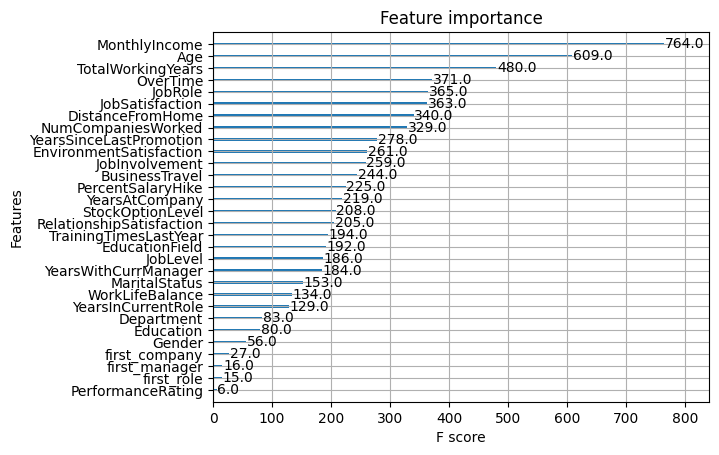

In [48]:
clf = evaluate_study(recall_study.best_trials[2].params, d_train, d_val, d_test, y_test)

In [49]:
optuna.visualization.plot_optimization_history(recall_study)

In [50]:
optuna.visualization.plot_slice(recall_study)

In [51]:
optuna.visualization.plot_param_importances(recall_study)

# f1 study

In [52]:
best_trials_evaluator(f1_study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.53,0.75,0.62,0.81,0.44,0.85,0.39,2.38,"{'alpha': 1.696476377114387e-07, 'booster': 'g..."


In [53]:
f1_study.best_params

{'alpha': 1.696476377114387e-07,
 'booster': 'gbtree',
 'colsample_bylevel': 0.19963227482091733,
 'colsample_bynode': 0.6813075951325538,
 'colsample_bytree': 0.4290487143994658,
 'gamma': 2.3362705909791543e-07,
 'grow_policy': 'depthwise',
 'lambda': 1.2720129234159178e-08,
 'learning_rate': 0.8215293154086597,
 'max_bin': 1018,
 'max_depth': 1,
 'min_child_weight': 2.7240330389558993,
 'num_parallel_tree': 357,
 'scale_pos_weight': 3.5029239603459876,
 'subsample': 0.9053015845957769}

[0]	validate-auc:0.79351
[79]	validate-auc:0.89514
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       185
           1       0.53      0.75      0.62        36

    accuracy                           0.85       221
   macro avg       0.74      0.81      0.76       221
weighted avg       0.88      0.85      0.86       221

[[161  24]
 [  9  27]]
161
24
9
27


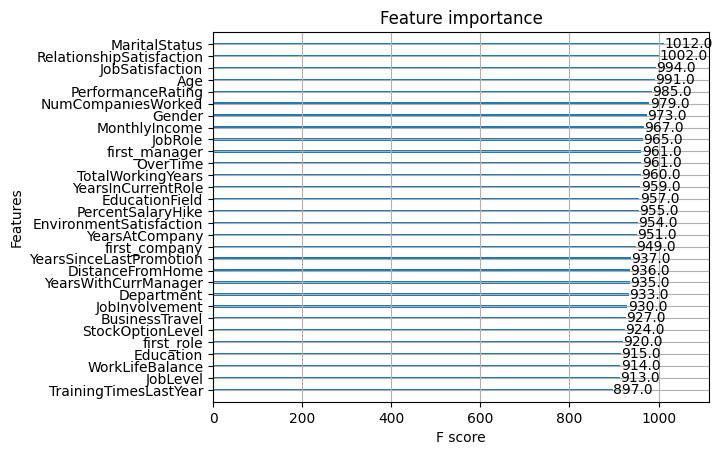

In [54]:
clf = evaluate_study(f1_study.best_params, d_train, d_val, d_test, y_test)

In [55]:
optuna.visualization.plot_optimization_history(f1_study)

In [56]:
optuna.visualization.plot_slice(f1_study)

In [57]:
optuna.visualization.plot_param_importances(f1_study)

# f1 weighted

In [58]:
best_trials_evaluator(f1_weighted_study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.56,0.56,0.56,0.73,0.38,0.86,0.38,2.31,"{'alpha': 3.3773274072757216e-05, 'booster': '..."


[0]	validate-auc:0.81730
[19]	validate-auc:0.88942
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       185
           1       0.56      0.56      0.56        36

    accuracy                           0.86       221
   macro avg       0.73      0.73      0.73       221
weighted avg       0.86      0.86      0.86       221

[[169  16]
 [ 16  20]]
169
16
16
20


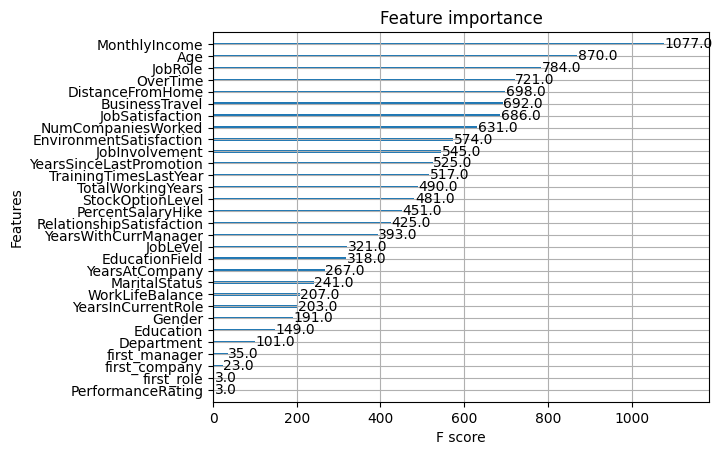

In [59]:
clf = evaluate_study(f1_weighted_study.best_params, d_train, d_val, d_test, y_test)

In [60]:
optuna.visualization.plot_optimization_history(f1_weighted_study)

In [61]:
optuna.visualization.plot_slice(f1_weighted_study)

In [62]:
optuna.visualization.plot_param_importances(f1_weighted_study)

# f1 weighted 2 - a lot of parallel trees

In [63]:
best_trials_evaluator(f1_weighted_study2)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.56,0.56,0.56,0.73,0.38,0.86,0.38,2.31,"{'alpha': 2.225680182080406, 'booster': 'dart'..."


[0]	validate-auc:0.82502
[59]	validate-auc:0.89189
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       185
           1       0.56      0.56      0.56        36

    accuracy                           0.86       221
   macro avg       0.73      0.73      0.73       221
weighted avg       0.86      0.86      0.86       221

[[169  16]
 [ 16  20]]
169
16
16
20


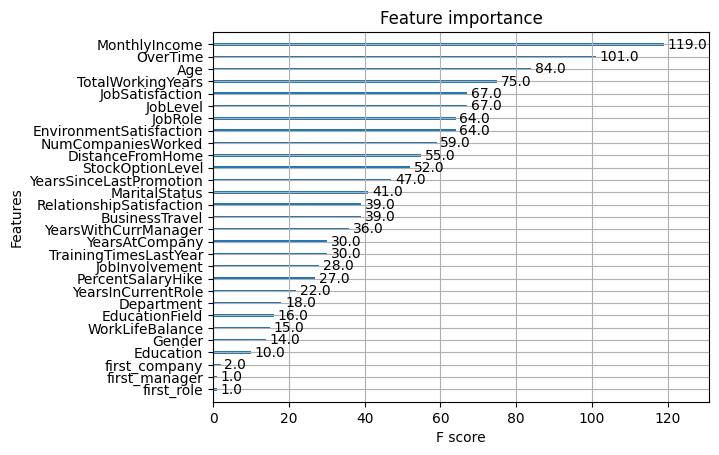

In [64]:
clf = evaluate_study(f1_weighted_study2.best_params, d_train, d_val, d_test, y_test)

In [65]:
optuna.visualization.plot_optimization_history(f1_weighted_study2)

In [66]:
optuna.visualization.plot_slice(f1_weighted_study2)

In [67]:
optuna.visualization.plot_param_importances(f1_weighted_study2)

# f1 weighted 3 - no parallel trees, pure boosting

In [68]:
best_trials_evaluator(f1_weighted_study3)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.48,0.53,0.5,0.71,0.33,0.83,0.41,2.74,"{'alpha': 2.5687651513186927, 'booster': 'dart..."


[0]	validate-auc:0.81722
[19]	validate-auc:0.87985
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       185
           1       0.47      0.53      0.50        36

    accuracy                           0.83       221
   macro avg       0.69      0.71      0.70       221
weighted avg       0.84      0.83      0.83       221

[[164  21]
 [ 17  19]]
164
21
17
19


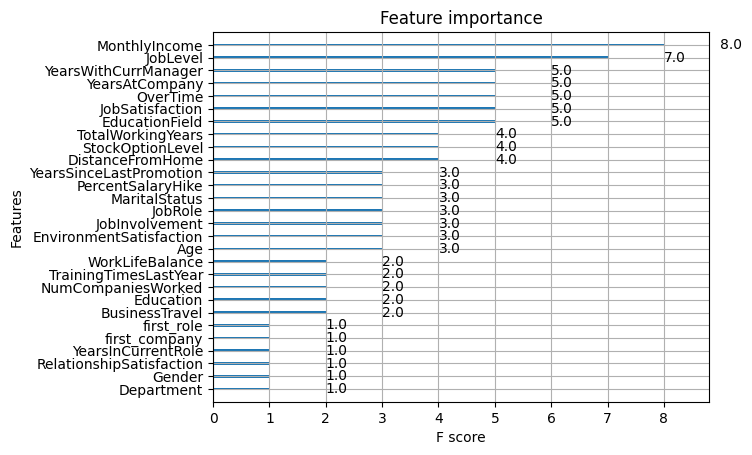

In [69]:
clf = evaluate_study(f1_weighted_study3.best_params, d_train, d_val, d_test, y_test)

In [70]:
optuna.visualization.plot_optimization_history(f1_weighted_study3)

In [71]:
optuna.visualization.plot_slice(f1_weighted_study3)

In [72]:
optuna.visualization.plot_param_importances(f1_weighted_study3)

# auc study

In [73]:
best_trials_evaluator(auc_study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.4,0.81,0.54,0.79,0.36,0.77,0.48,3.61,"{'alpha': 6.999142464001718e-06, 'booster': 'g..."


[0]	validate-auc:0.83799
[76]	validate-auc:0.88216
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       185
           1       0.40      0.81      0.54        36

    accuracy                           0.77       221
   macro avg       0.68      0.79      0.69       221
weighted avg       0.86      0.77      0.80       221

[[142  43]
 [  7  29]]
142
43
7
29


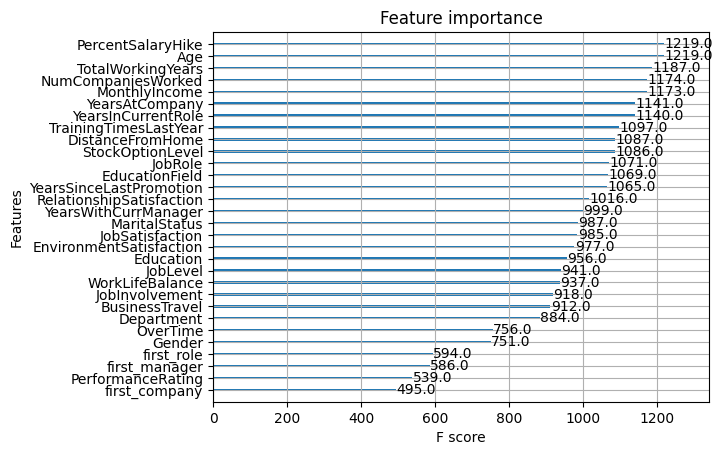

In [74]:
clf = evaluate_study(auc_study.best_params, d_train, d_val, d_test, y_test)

In [75]:
optuna.visualization.plot_optimization_history(auc_study)

In [76]:
optuna.visualization.plot_slice(auc_study)

In [77]:
optuna.visualization.plot_param_importances(auc_study)

# log loss study

In [78]:
best_trials_evaluator(logloss_study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.88,0.42,0.57,0.7,0.46,0.9,0.32,1.66,"{'alpha': 0.0018179900731274093, 'booster': 'g..."


[0]	validate-auc:0.79467
[56]	validate-auc:0.86965
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       185
           1       0.88      0.42      0.57        36

    accuracy                           0.90       221
   macro avg       0.89      0.70      0.75       221
weighted avg       0.89      0.90      0.88       221

[[183   2]
 [ 21  15]]
183
2
21
15


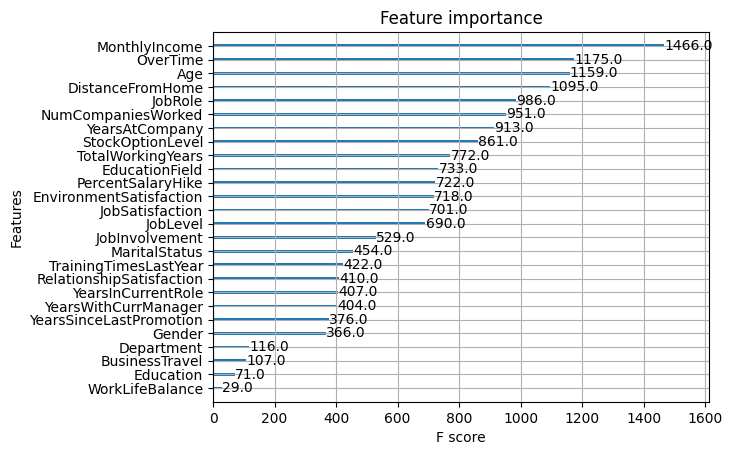

In [79]:
clf = evaluate_study(logloss_study.best_params, d_train, d_val, d_test, y_test)

In [80]:
optuna.visualization.plot_optimization_history(logloss_study)

In [81]:
optuna.visualization.plot_slice(logloss_study)

In [82]:
optuna.visualization.plot_param_importances(logloss_study)